https://www.kaggle.com/fayomi/advertising

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

In [17]:
df = pd.read_csv('advertising/advertising.csv')
sdf = spark.read.csv('advertising/advertising.csv', header=True)

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
sdf.registerTempTable('advertising')

### サマリ

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
sdf.summary().toPandas()

,summary,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,mean,65.00020000000012,36.009,55000.00008000003,180.00010000000003,None,None,0.481,None,None,0.5
2,stddev,15.853614567500212,8.785562310125924,13414.634022282358,43.9023393019801,None,None,0.49988887654046543,None,None,0.5002501876563867
3,min,32.6,19,13996.5,104.78,Adaptive 24hour Graphic Interface,Adamsbury,0,Afghanistan,2016-01-01 02:52:10,0
4,25%,51.3,29.0,46974.15,138.71,None,None,0.0,None,None,0.0
5,50%,68.18,35.0,57009.76,182.84,None,None,0.0,None,None,0.0
6,75%,78.54,42.0,65461.92,218.79,None,None,1.0,None,None,1.0
7,max,91.43,61,79484.8,269.96,Visionary reciprocal circuit,Zacharyton,1,Zimbabwe,2016-07-24 00:22:16,1


### ヒストグラム

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB73C36D68>,
      dtype=object)

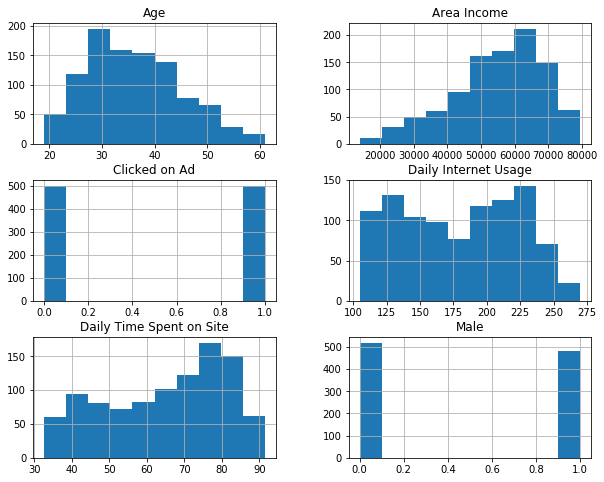

In [15]:
df.hist()

### クリック有無毎の各平均値

In [36]:
spark.sql('''
SELECT
  `Clicked on Ad`
  , AVG(Age) as avg_age
  , AVG(`Area Income`) as avg_area_income
  , AVG(`Daily Internet Usage`) as avg_daily_interest_usage
  , AVG(Male) as avg_male
  , AVG(`Daily Time Spent on Site`) as avg_daily_time
FROM
  advertising
GROUP BY
  `Clicked on Ad`
''').show()

+-------------+-------+------------------+------------------------+--------+-----------------+
|Clicked on Ad|avg_age|   avg_area_income|avg_daily_interest_usage|avg_male|   avg_daily_time|
+-------------+-------+------------------+------------------------+--------+-----------------+
|            0| 31.684| 61385.58641999997|      214.51373999999979|     0.5|76.85461999999998|
|            1| 40.334|48614.413739999996|      145.48646000000005|   0.462|53.14577999999996|
+-------------+-------+------------------+------------------------+--------+-----------------+



### CTR時間依存性

In [43]:
spark.sql('''
SELECT
  HOUR(to_timestamp(timestamp)) as hour
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  HOUR(to_timestamp(timestamp))
ORDER BY
  hour
''').show()

+----+-------------------+
|hour|                CTR|
+----+-------------------+
|   0| 0.5777777777777777|
|   1|                0.5|
|   2| 0.4722222222222222|
|   3| 0.5476190476190477|
|   4|                0.5|
|   5| 0.4772727272727273|
|   6| 0.5897435897435898|
|   7|0.48148148148148145|
|   8| 0.4883720930232558|
|   9| 0.5714285714285714|
|  10|0.45161290322580644|
|  11|                0.6|
|  12|0.42105263157894735|
|  13|                0.5|
|  14| 0.4883720930232558|
|  15| 0.5428571428571428|
|  16|0.41025641025641024|
|  17| 0.5609756097560976|
|  18| 0.6097560975609756|
|  19|0.48717948717948717|
+----+-------------------+
only showing top 20 rows



In [44]:
spark.sql('''
SELECT
  DAY(to_timestamp(timestamp)) as day
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  DAY(to_timestamp(timestamp))
ORDER BY
  day
''').show()

+---+-------------------+
|day|                CTR|
+---+-------------------+
|  1| 0.5757575757575758|
|  2|                0.4|
|  3| 0.5652173913043478|
|  4| 0.3888888888888889|
|  5| 0.5142857142857142|
|  6|               0.56|
|  7|             0.4375|
|  8|0.42857142857142855|
|  9| 0.5882352941176471|
| 10| 0.5135135135135135|
| 11|            0.46875|
| 12| 0.6896551724137931|
| 13| 0.5666666666666667|
| 14| 0.6363636363636364|
| 15| 0.4878048780487805|
| 16|                0.4|
| 17|0.42857142857142855|
| 18| 0.4857142857142857|
| 19|0.41379310344827586|
| 20| 0.3333333333333333|
+---+-------------------+
only showing top 20 rows



In [45]:
spark.sql('''
SELECT
  MONTH(to_timestamp(timestamp)) as month
  , SUM(`Clicked on Ad`) / COUNT(`Clicked on Ad`) AS CTR
FROM
  advertising
GROUP BY
  MONTH(to_timestamp(timestamp))
ORDER BY
  month
''').show()

+-----+-------------------+
|month|                CTR|
+-----+-------------------+
|    1|0.46938775510204084|
|    2|            0.51875|
|    3|0.47435897435897434|
|    4| 0.5034013605442177|
|    5| 0.5374149659863946|
|    6|                0.5|
|    7|0.49504950495049505|
+-----+-------------------+

